In [3]:
from src import utils

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
X_TRAIN_PATH = "data/interim/X_train.pkl"
X_train = utils.deserialize_data(X_TRAIN_PATH)

Y_TRAIN_PATH = "data/interim/y_train.pkl"
y_train = utils.deserialize_data(Y_TRAIN_PATH)

In [5]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15884,25,241875,MORTGAGE,4.0,EDUCATION,A,16000,7.05,0.07,N,4
15138,21,18000,RENT,5.0,PERSONAL,B,1500,12.18,0.08,N,4
7474,25,53000,MORTGAGE,10.0,MEDICAL,B,16000,12.53,0.30,N,2
18212,28,16800,OWN,NaN,MEDICAL,C,5000,13.98,0.30,N,8
6493,25,50000,MORTGAGE,2.0,VENTURE,A,10000,7.90,0.20,N,2


In [6]:
num_cols = X_train.select_dtypes(include=['int', 'float']).columns
cat_cols= X_train.select_dtypes('object').columns

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 15884 to 17068
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  object 
 3   person_emp_length           25326 non-null  float64
 4   loan_intent                 26064 non-null  object 
 5   loan_grade                  26064 non-null  object 
 6   loan_amnt                   26064 non-null  int64  
 7   loan_int_rate               23563 non-null  float64
 8   loan_percent_income         26064 non-null  float64
 9   cb_person_default_on_file   26064 non-null  object 
 10  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


In [8]:
## kesimpulan

print(len(num_cols))
print(len(cat_cols))

7
4


The total Number of data type based on num and cat is matched with df.info(), there is a 
object data, need to encode it later

In [9]:
dupes = X_train[X_train.duplicated(keep=False)]
dupes_sorted = dupes.sort_values(by='person_income')
dupes_sorted

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15952,24,7800,RENT,1.0,EDUCATION,B,1000,11.36,0.13,N,4
16821,24,7800,RENT,1.0,EDUCATION,B,1000,11.36,0.13,N,4
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,0.18,N,4
28295,32,18000,OWN,0.0,VENTURE,A,4750,7.88,0.26,N,6
...,...,...,...,...,...,...,...,...,...,...,...
27677,35,160000,OWN,10.0,VENTURE,B,24000,11.83,0.15,N,9
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0.08,N,17
29160,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0.08,N,17
27881,28,604000,MORTGAGE,12.0,PERSONAL,B,25000,9.01,0.04,N,9


# Kesimpulan

I will drop the duplicate rows but just left 1 of them

In [10]:
X_train.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              738
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2501
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# Kesimpulan

I will drop theese null values or imput it with mean or median

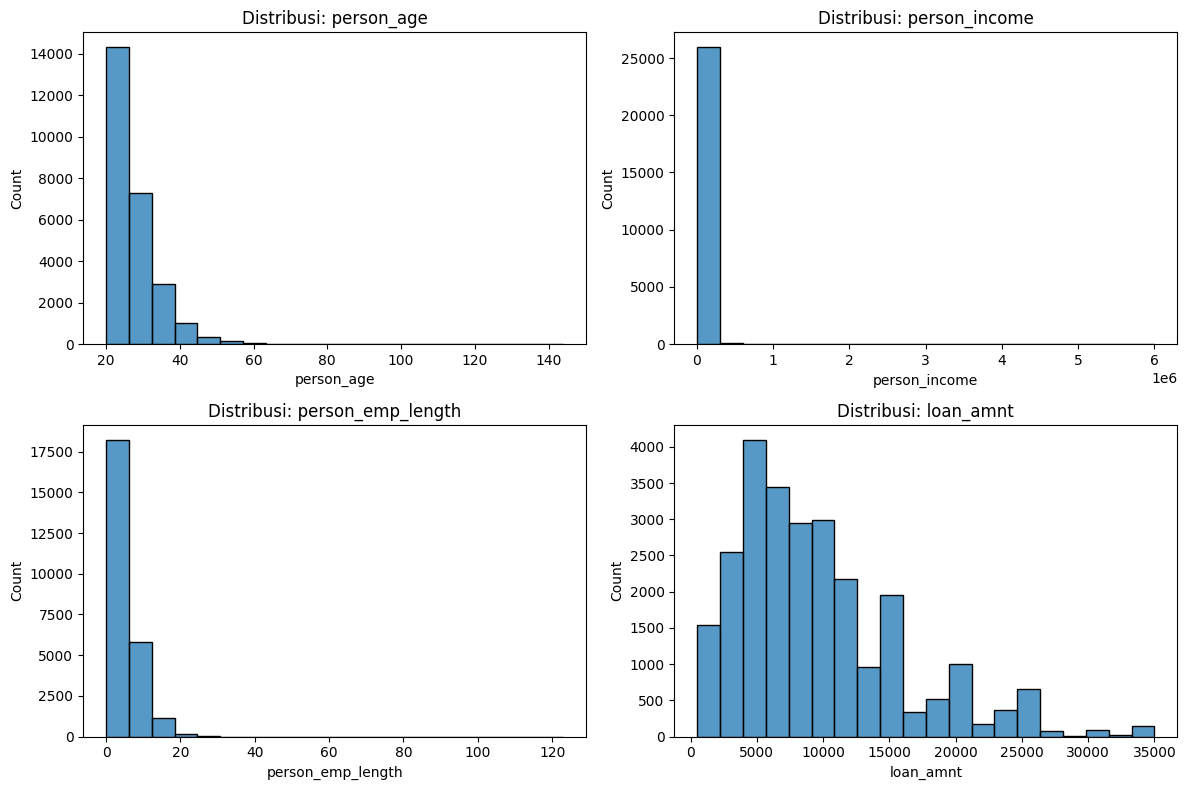

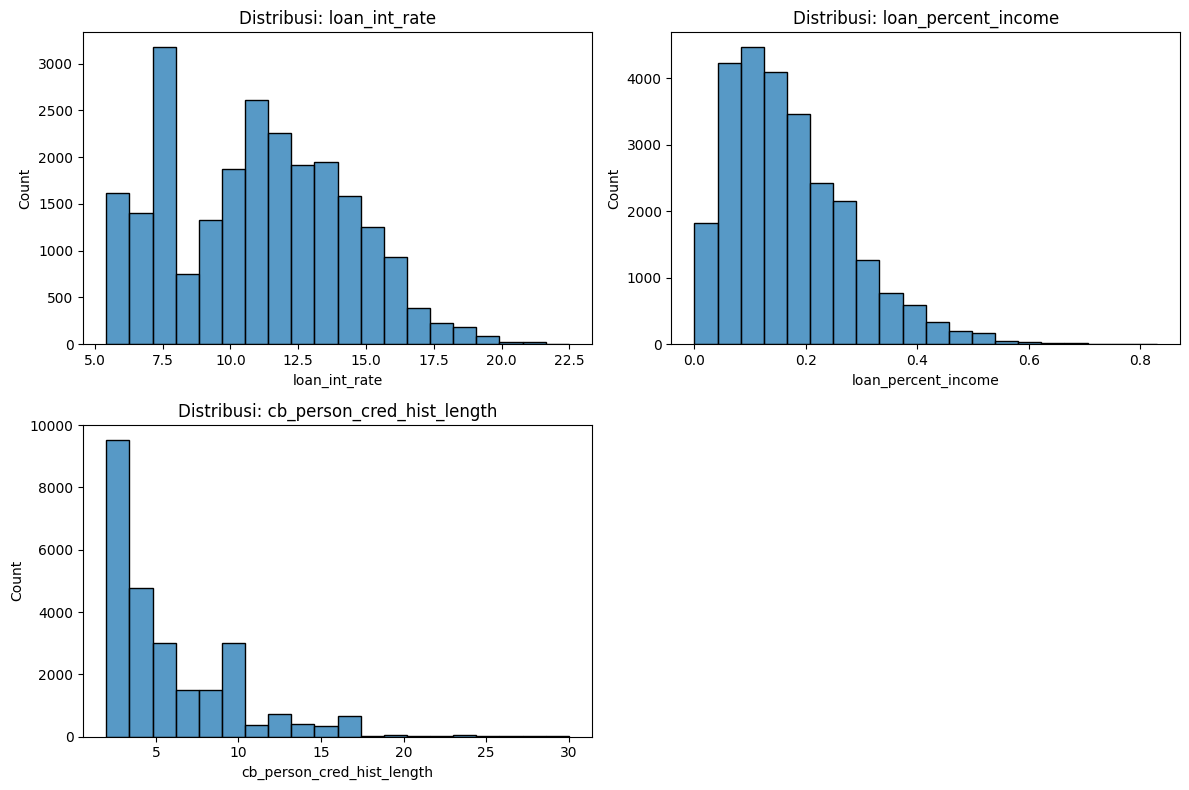

In [11]:
X_train_ = X_train[num_cols]

n_cols = len(X_train_.columns)
cols_per_page = 4  # karena 2x2

for i in range(0, n_cols, cols_per_page):
    batch_cols = X_train_.columns[i:i+cols_per_page]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    for j, col in enumerate(batch_cols):
        sns.histplot(data=X_train_, x=col, bins=20, ax=axes[j])
        axes[j].set_title(f'Distribusi: {col}')
        axes[j].set_xlabel(col)
        axes[j].set_ylabel('Count')

    for k in range(len(batch_cols), 4):
        fig.delaxes(axes[k])
    
    plt.tight_layout()
    plt.show()

- Almost All is Posirively Skewed
- Pretty Sure all of them have an outliers, especially age, income, emp lenght
- Next step is normalisaasion or standardization

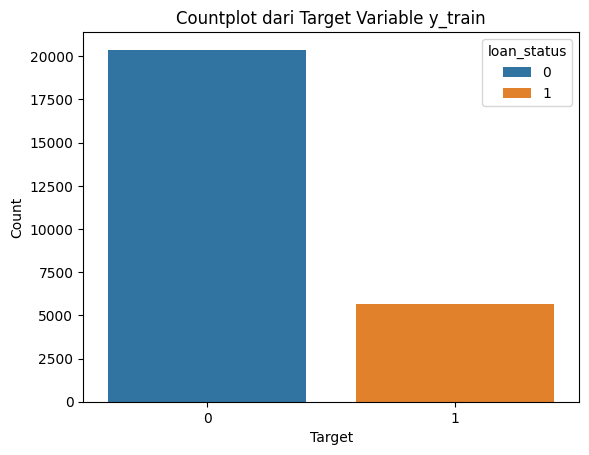

In [12]:
y_train_df = pd.DataFrame(y_train, columns=['loan_status'])

sns.countplot(data=y_train_df, x='loan_status', hue='loan_status')

plt.title('Countplot dari Target Variable y_train')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

- data is very imbalance, need oversampling or undersampling

## WHAT SHOULD DO NEXT SUMMARY


- Drop duplicates keep 1
- Drop row containing none or imput wit median or mean
- Normalisation/Standardization
- Over/Under sampling